In [7]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt

In [8]:
method_dict = {"vi": "D-CODE", "diff": "SR-T"}#, "spline": "SR-S", "gp": "SR-G"}
val_dict = {
    "noise": "sigma",
    #"freq": "del_t",
    #"n": "n",
}


In [34]:
name_dict = {
    "GompertzODE-noise": " ",
    "GompertzODE_par_b-noise": "Parameter: b",
    "GompertzODE_par_ba-noise": "Parameters: a,b",
}

In [10]:
ode_list = ["GompertzODE"]#, "LogisticODE"]"

In [43]:
def plot_df(df, x_val="sigma"):
    for method in method_dict.keys():
        df_sub = df[df.method == method]
        df_sub = df_sub.dropna()

        plt.fill_between(
            df_sub[x_val],
            df_sub.rate - df_sub.rate_sd,
            df_sub.rate + df_sub.rate_sd,
            alpha=0.3,
        )

        plt.plot(df_sub[x_val], df_sub.rate, "o-", label=method_dict[method])
        plt.ylim(-0.05, 1.05)

In [44]:
def plot_df_2(df, x_val="sigma"):
    for method in method_dict.keys():
        df_sub = df[df.method == method]
        df_sub = df_sub.dropna()

        plt.fill_between(
            df_sub[x_val],
            df_sub.ks - df_sub.ks_sd,
            df_sub.ks + df_sub.ks_sd,
            alpha=0.3,
        )

        plt.plot(df_sub[x_val], df_sub.ks, "o-", label=method_dict[method])
        plt.ylim(-0.05, 0.2)

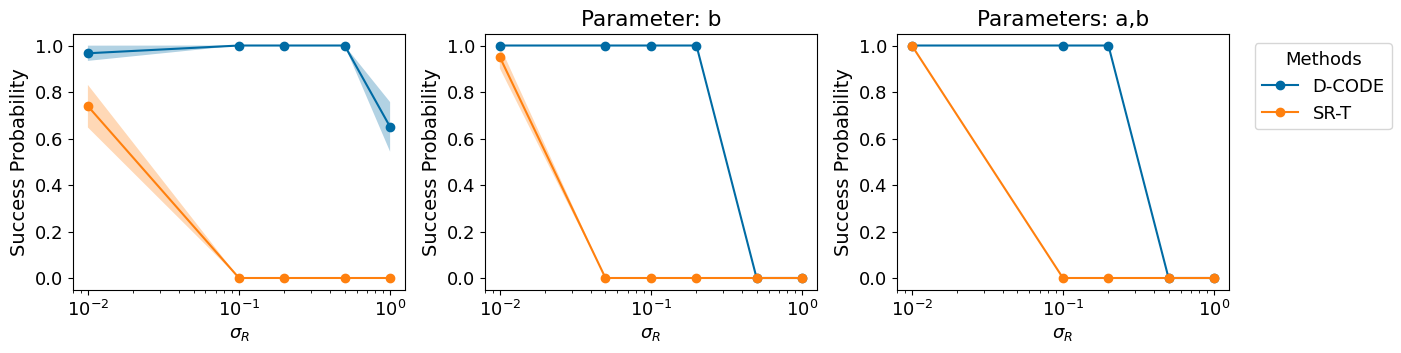

In [56]:
plt.figure(figsize=(14, 6))
plt.style.use("tableau-colorblind10")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.rcParams["font.size"] = "13"

counter = 1
ode = "GompertzODE"
val_key = "noise"
x_val = val_dict[val_key]

for name1, name2 in name_dict.items():
    df = pds.read_csv("results/{}.txt".format(name1), header=None)
    #print(name1)

    df.columns = [
        "ode",
        "freq",
        "n",
        "sigma",
        "method",
        "rate",
        "rate_sd",
        "ks",
        "ks_sd",
    ]
    df["del_t"] = 1.0 / df["freq"]
    df = df.sort_values(["method", x_val])

    plot_conf = 230 + counter
    plt.subplot(plot_conf)
    plot_df(df, x_val=x_val)

    plt.xlabel(r"$\sigma_R$")
    plt.ylabel("Success Probability", size=14)
    plt.title("{}".format(name2))
    plt.xscale("log")

    counter += 1

plt.legend(title="Methods", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout(pad=0.2)
plt.savefig("growth_results.png", dpi=200)

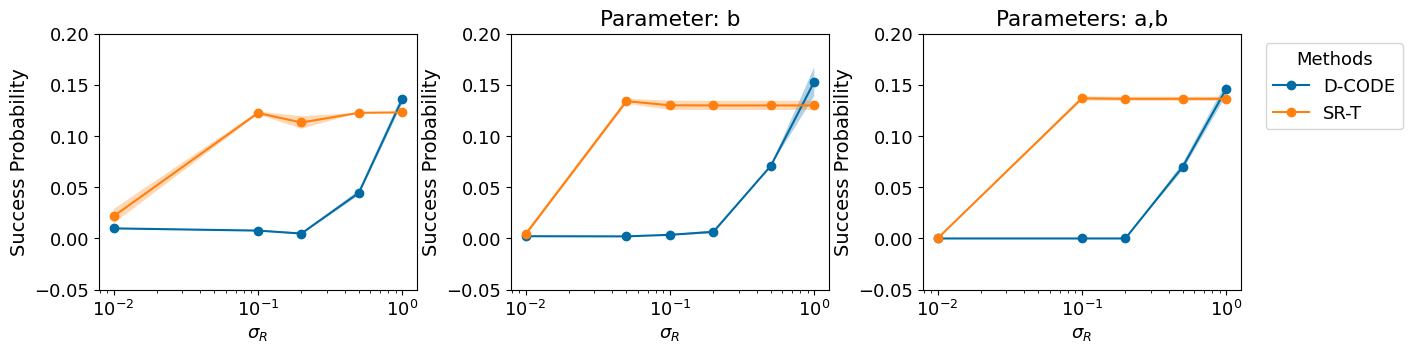

In [54]:
plt.figure(figsize=(14, 6))
plt.style.use("tableau-colorblind10")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.rcParams["font.size"] = "13"

counter = 1
ode = "GompertzODE"
val_key = "noise"
x_val = val_dict[val_key]

for name1, name2 in name_dict.items():
    df = pds.read_csv("results/{}.txt".format(name1), header=None)
    #print(name1)

    df.columns = [
        "ode",
        "freq",
        "n",
        "sigma",
        "method",
        "rate",
        "rate_sd",
        "ks",
        "ks_sd",
    ]
    df["del_t"] = 1.0 / df["freq"]
    df = df.sort_values(["method", x_val])

    plot_conf = 230 + counter
    plt.subplot(plot_conf)
    plot_df_2(df, x_val=x_val)

    plt.xlabel(r"$\sigma_R$")
    plt.ylabel("Success Probability", size=14)
    plt.title("{}".format(name2))
    plt.xscale("log")

    counter += 1


plt.legend(title="Methods", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout(pad=0.2)
plt.savefig("growth_results.png", dpi=200)

In [19]:
plt.figure(figsize=(14, 6))
plt.style.use("tableau-colorblind10")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.rcParams["font.size"] = "13"

counter = 1
for i in range(len(ode_list)):
    ode = ode_list[i]
    for val_key, x_val in val_dict.items():
        #print(ode, val_key, x_val)
        df = pds.read_csv("results/{}-{}_par_b.txt".format(ode, val_key), header=None)

        df.columns = [
            "ode",
            "freq",
            "n",
            "sigma",
            "method",
            "rate",
            "rate_sd",
            "ks",
            "ks_sd",
        ]
        df["del_t"] = 1.0 / df["freq"]
        df = df.sort_values(["method", x_val])

        plot_conf = 230 + counter
        plt.subplot(plot_conf)
        plot_df(df, x_val=x_val)

        if counter == 1 or counter == 4:
            plt.ylabel("Success Probability", size=14)

        if counter == 1:
            plt.title(r"$\sigma_R$")
            plt.xscale("log")
        elif counter == 2:
            plt.title(r"Gompertz Model \n Varying step size $\Delta t$")
            plt.xscale("log")
        elif counter == 3:
            plt.title(r"Varying sample size $N$")
        elif counter == 5:
            plt.title(r"Generalized Logistic Model")

        if counter == 4:
            plt.xlabel(r"$\sigma_R$", size=16)
            plt.xscale("log")
        elif counter == 5:
            plt.xlabel(r"$\Delta t$", size=16)
            plt.xscale("log")
        elif counter == 6:
            plt.xlabel(r"$N$", size=16)

        counter += 1


plt.legend(title="Methods", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout(pad=0.2)
plt.savefig("growth_results.png", dpi=200)

FileNotFoundError: [Errno 2] No such file or directory: 'results/GompertzODE-noise_par_b.txt'

<Figure size 1400x600 with 0 Axes>

## Selkov Table

In [ ]:
ode = "SelkovODE"

val_key = list(val_dict.keys())[0]
x_val = val_dict[val_key]

In [ ]:
df = pds.read_csv("results/{}-{}.txt".format(ode, val_key), header=None)

df.columns = ["ode", "freq", "n", "sigma", "method", "rate", "rate_sd", "ks", "ks_sd"]
df["del_t"] = 1.0 / df["freq"]
df = df.sort_values(["method", x_val])
df["x_id"] = 0
df0 = df

In [ ]:
df = pds.read_csv("results/{}-{}-1.txt".format(ode, val_key), header=None)

df.columns = ["ode", "freq", "n", "sigma", "method", "rate", "rate_sd", "ks", "ks_sd"]
df["del_t"] = 1.0 / df["freq"]
df = df.sort_values(["method", x_val])
df["x_id"] = 1
df1 = df

In [ ]:
df = pds.read_csv("results/{}-{}-param.txt".format(ode, val_key), header=None)

df.columns = [
    "ode",
    "freq",
    "n",
    "sigma",
    "method",
    "sigma_rmse",
    "sigma_sd",
    "rho_rmse",
    "rho_sd",
]
df["del_t"] = 1.0 / df["freq"]
df = df.sort_values(["method", x_val])
df["x_id"] = 0
df0_param = df

In [ ]:
df = pds.read_csv("results/{}-{}-param-1.txt".format(ode, val_key), header=None)

df.columns = [
    "ode",
    "freq",
    "n",
    "sigma",
    "method",
    "sigma_rmse",
    "sigma_sd",
    "rho_rmse",
    "rho_sd",
]
df["del_t"] = 1.0 / df["freq"]
df = df.sort_values(["method", x_val])
df["x_id"] = 1
df1_param = df

In [ ]:
df = pds.concat([df0, df1])
df_param = pds.concat([df0_param, df1_param])

In [ ]:
df = pds.merge(df, df_param)

In [ ]:
tbl_rate = pds.pivot_table(df, values="rate", index=["x_id", "method"], columns="sigma")
tbl_rate["val"] = "rate"

In [ ]:
tbl_rate_sd = pds.pivot_table(
    df, values="rate_sd", index=["x_id", "method"], columns="sigma"
)
tbl_rate_sd["val"] = "rate_sd"

In [ ]:
tbl_sigma_rmse = pds.pivot_table(
    df, values="sigma_rmse", index=["x_id", "method"], columns="sigma"
)
tbl_sigma_rmse["val"] = "sigma_rmse"

In [ ]:
tbl_sigma_sd = pds.pivot_table(
    df, values="sigma_sd", index=["x_id", "method"], columns="sigma"
)
tbl_sigma_sd["val"] = "sigma_sd"

In [ ]:
tbl_sigma_ks = pds.pivot_table(
    df, values="ks", index=["x_id", "method"], columns="sigma"
)
tbl_sigma_ks["val"] = "ks"
tbl_sigma_ks

In [ ]:
tbl_sigma_ks_sd = pds.pivot_table(
    df, values="ks_sd", index=["x_id", "method"], columns="sigma"
)
tbl_sigma_ks_sd["val"] = "ks_sd"
tbl_sigma_ks_sd

In [ ]:
selkov_table = pds.concat([tbl_rate, tbl_rate_sd, tbl_sigma_rmse, tbl_sigma_sd])
selkov_table

In [ ]:
tt = selkov_table.reset_index()

In [ ]:
tt[tt["method"] == "gp"]

In [ ]:
tt[tt["method"] == "diff"]

In [ ]:
selkov_table.to_csv("Selkov_results.csv")

## Lorenz results

In [ ]:
def plot_df_ax(df, ax, x_val="sigma"):
    for method in method_dict.keys():
        df_sub = df[df.method == method]
        df_sub = df_sub.dropna()

        ax.fill_between(
            df_sub[x_val],
            df_sub.rate - df_sub.rate_sd,
            df_sub.rate + df_sub.rate_sd,
            alpha=0.3,
        )

        ax.plot(df_sub[x_val], df_sub.rate, "o-", label=method_dict[method])
        ax.set_ylim(-0.05, 1.05)

In [ ]:
## this part is the placeholder


def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0.0, 1.0, 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

In [ ]:
import pickle

with open("results/Lorenz_traj.pkl", "rb") as f:
    diff_dict = pickle.load(f)

with open("results/Lorenz_vi_traj.pkl", "rb") as f:
    vi_dict = pickle.load(f)

with open("results/Lorenz_true_traj.pkl", "rb") as f:
    true_dict = pickle.load(f)

with open("results/Lorenz_node_traj2.pkl", "rb") as f:
    node_dict = pickle.load(f)

In [ ]:
def plot_trac(ax, xs, ys, zs, title, lw=0.5):
    elev = 5.0
    azim = 120.0
    ax.view_init(elev, azim)
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

    ax.plot(xs, ys, zs, lw=lw)
    ax.set_title(title)


#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_zticks([])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


plt.figure(figsize=(12, 6))
plt.style.use("tableau-colorblind10")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.rcParams["font.size"] = "13"


gs = gridspec.GridSpec(3, 12)
ax1a = plt.subplot(gs[0, :4])
ax1b = plt.subplot(gs[0, 4:8])
ax1c = plt.subplot(gs[0, 8:])

# ax1a = plt.subplot(gs[0, :3])
# ax1b = plt.subplot(gs[0, 3:6])
# ax1c = plt.subplot(gs[0, 6:9])

ax2a = plt.subplot(gs[1:, :3], projection="3d")
ax2b = plt.subplot(gs[1:, 3:6], projection="3d")
ax2c = plt.subplot(gs[1:, 6:9], projection="3d")
ax2d = plt.subplot(gs[1:, 9:], projection="3d")


for i, ax in enumerate(plt.gcf().axes):

    if i < 3:
        x_id = i

        if x_id == 0:
            df = pds.read_csv("results/Lorenz-noise.txt", header=None)
        else:
            df = pds.read_csv("results/Lorenz-noise-{}.txt".format(x_id), header=None)

        df.columns = [
            "ode",
            "freq",
            "n",
            "sigma",
            "method",
            "rate",
            "rate_sd",
            "ks",
            "ks_sd",
        ]
        df["del_t"] = 1.0 / df["freq"]
        df = df.sort_values(["method", "sigma"])
        plot_df_ax(df, ax)
        ax.set_xlabel("Noise $\sigma_R$")
        if i == 0:
            ax.set_title("Success Prob. $\dot{x}_1(t)$")
        elif i == 1:
            ax.set_title("Success Prob. $\dot{x}_2(t)$")
        else:
            ax.set_title("Success Prob. $\dot{x}_3(t)$")

            ax.legend(bbox_to_anchor=(1.005, 1), loc="upper left", fontsize=10)
    #             ax.legend(loc='center left', fontsize=10)
    else:

        if i == 3:
            plot_trac(ax, true_dict["x"], true_dict["y"], true_dict["z"], str(i))
            ax.set_title("Ground truth")
        elif i == 4:
            plot_trac(ax, vi_dict["x"], vi_dict["y"], vi_dict["z"], str(i), lw=0.3)
            ax.set_title("D-CODE")
        elif i == 5:
            plot_trac(
                ax, diff_dict["x"], diff_dict["y"], diff_dict["z"], str(i), lw=0.8
            )
            ax.set_title("SR-T")
        else:
            plot_trac(
                ax, node_dict["x"], node_dict["y"], node_dict["z"], str(i), lw=2.0
            )
            ax.set_title("Neural ODE")

        ax.set_zlim(0, 50)
        ax.set_xlim(-25, 25)
        ax.set_ylim(-25, 25)


plt.tight_layout()


plt.savefig("lorenz.png", dpi=200)

plt.show()

## sensitivity plot

In [ ]:
def plot_df2(df_sub, x_val="n_basis"):

    plt.fill_between(
        df_sub[x_val],
        df_sub.rate - df_sub.rate_sd,
        df_sub.rate + df_sub.rate_sd,
        alpha=0.3,
    )

    plt.plot(df_sub[x_val], df_sub.rate, "o-")
    plt.ylim(-0.05, 1.05)

In [ ]:
ode_list = ["GompertzODE", "Lorenz"]
bas_list = ["sine", "cubic"]

In [ ]:
plt.figure(figsize=(12, 4))
plt.style.use("tableau-colorblind10")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.rcParams["font.size"] = "13"

counter = 1
for i in range(len(ode_list)):
    ode = ode_list[i]

    for bas in bas_list:

        df = pds.read_csv("results/sensitivity_{}.txt".format(ode), header=None)
        df.columns = ["ode", "basis", "n_basis", "N", "rate", "rate_sd", "ks", "ks_sd"]
        df = df.sort_values(["basis", "n_basis"])

        df_sub = df[df["basis"] == bas]
        df_sub = df_sub.dropna()

        plot_conf = 220 + counter
        plt.subplot(plot_conf)
        plot_df2(df_sub)

        if counter > 2:
            plt.xlabel("Number of basis", size=16)

        #         if counter == 1 or counter == 4:
        #             plt.ylabel('Recovery Rate', size=16)
        plt.title("{} - {}".format(ode, bas))

        #         if counter == 1:
        #             plt.title('Varying noise level $\sigma_R$')
        #             plt.xscale('log')
        #         elif counter == 2:
        #             plt.title('Gompertz Model \n Varying step size $\Delta t$')
        #         elif counter == 3:
        #             plt.title('Varying sample size $N$')
        #         elif counter == 4:
        #             plt.title('Generalized Logistic Model')

        #         if counter == 4:
        #             plt.xlabel(r'$\sigma_R$', size=16)
        #             plt.xscale('log')
        #         elif counter == 5:
        #             plt.xlabel(r'$\Delta t$', size=16)
        #         elif counter == 6:
        #             plt.xlabel(r'$N$', size=16)

        counter += 1


plt.tight_layout(pad=0.2)
plt.savefig("sensitivity_results.png", dpi=200)

## objective

In [ ]:
method_dict = {"vi": "D-CODE", "diff": "SR-T", "spline": "SR-S", "gp": "SR-G"}

In [ ]:
val_dict = {
    "noise": "sigma",
    "freq": "del_t",
    "n": "n",
}

In [ ]:
ode_list = ["GompertzODE", "LogisticODE"]

In [ ]:
def plot_df(df, x_val="sigma"):
    for method in method_dict.keys():
        df_sub = df[df.method == method]
        df_sub = df_sub.dropna()

        #         if x_val == 'sigma':
        #             df_sub = df_sub[df_sub[x_val] < 0.6]

        plt.fill_between(
            df_sub[x_val], df_sub.ks - df_sub.ks_sd, df_sub.ks + df_sub.ks_sd, alpha=0.3
        )

        plt.plot(df_sub[x_val], df_sub.ks, "o-", label=method_dict[method])


#         plt.ylim([-0.05, None])

In [ ]:
plt.figure(figsize=(12, 4))
plt.style.use("tableau-colorblind10")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.rcParams["font.size"] = "13"

counter = 1
for i in range(len(ode_list)):
    ode = ode_list[i]
    for val_key, x_val in val_dict.items():
        df = pds.read_csv("results/{}-{}.txt".format(ode, val_key), header=None)

        df.columns = [
            "ode",
            "freq",
            "n",
            "sigma",
            "method",
            "rate",
            "rate_sd",
            "ks",
            "ks_sd",
        ]
        df["del_t"] = 1.0 / df["freq"]
        df = df.sort_values(["method", x_val])

        plot_conf = 230 + counter
        plt.subplot(plot_conf)
        plot_df(df, x_val=x_val)

        if counter == 1 or counter == 4:
            plt.ylabel("Objective $d_x$", size=16)

        if counter == 1:
            plt.title("Varying noise level $\sigma_R$")
            plt.xscale("log")
        elif counter == 2:
            plt.title("Gompertz Model \n Varying step size $\Delta t$")
            plt.xscale("log")
        elif counter == 3:
            plt.title("Varying sample size $N$")
        elif counter == 5:
            plt.title("Generalized Logistic Model")

        if counter == 4:
            plt.xlabel(r"$\sigma_R$", size=16)
            plt.xscale("log")
        elif counter == 5:
            plt.xlabel(r"$\Delta t$", size=16)
        elif counter == 6:
            plt.xlabel(r"$N$", size=16)

        counter += 1


plt.legend(title="Methods", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout(pad=0.2)
plt.savefig("growth_results_obj.png", dpi=200)

## Lorenz objective

In [ ]:
def plot_df_ax2(df, ax, x_val="sigma"):
    for method in method_dict.keys():
        df_sub = df[df.method == method]
        df_sub = df_sub.dropna()

        ax.fill_between(
            df_sub[x_val], df_sub.ks - df_sub.ks_sd, df_sub.ks + df_sub.ks_sd, alpha=0.3
        )

        ax.plot(df_sub[x_val], df_sub.ks, "o-", label=method_dict[method])


#         ax.set_ylim(-0.05, 1.05)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


plt.figure(figsize=(12, 2.5))
plt.style.use("tableau-colorblind10")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.rcParams["font.size"] = "13"


# gs = gridspec.GridSpec(3, 9)
ax1a = plt.subplot(1, 3, 1)
ax1b = plt.subplot(1, 3, 2)
ax1c = plt.subplot(1, 3, 3)

# ax1a = plt.subplot(gs[0, :3])
# ax1b = plt.subplot(gs[0, 3:6])
# ax1c = plt.subplot(gs[0, 6:9])

# ax2a = plt.subplot(gs[1:, :3], projection='3d')
# ax2b = plt.subplot(gs[1:, 3:6], projection='3d')
# ax2c = plt.subplot(gs[1:, 6:9], projection='3d')
# ax2d = plt.subplot(gs[1:, 9:], projection='3d')


for i, ax in enumerate(plt.gcf().axes):

    if i < 3:
        x_id = i

        if x_id == 0:
            df = pds.read_csv("results/Lorenz-noise.txt", header=None)
        else:
            df = pds.read_csv("results/Lorenz-noise-{}.txt".format(x_id), header=None)

        df.columns = [
            "ode",
            "freq",
            "n",
            "sigma",
            "method",
            "rate",
            "rate_sd",
            "ks",
            "ks_sd",
        ]
        df["del_t"] = 1.0 / df["freq"]
        df = df.sort_values(["method", "sigma"])
        plot_df_ax2(df, ax)
        ax.set_xlabel("Noise $\sigma_R$")
        if i == 0:
            ax.set_title("Objective $d_x$ for $\dot{x}_1(t)$")
        elif i == 1:
            ax.set_title("Objective $d_x$ for $\dot{x}_2(t)$")
        else:
            ax.set_title("Objective $d_x$ for $\dot{x}_3(t)$")

            ax.legend(bbox_to_anchor=(1.005, 1), loc="upper left", fontsize=10)
#             ax.legend(loc='center left', fontsize=10)


plt.tight_layout()


plt.savefig("lorenz_objective.png", dpi=200)

plt.show()

## Fraction ODE

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 2.5))
plt.subplot(1, 2, 1)
plt.style.use("tableau-colorblind10")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.rcParams["font.size"] = "13"
df = pds.read_csv("results/FracODE-noise.txt", header=None)
df.columns = ["ode", "freq", "n", "sigma", "method", "rate", "rate_sd", "ks", "ks_sd"]
df["del_t"] = 1.0 / df["freq"]
df = df.sort_values(["method", "sigma"])

x_val = "sigma"
for method in method_dict.keys():
    df_sub = df[df.method == method]
    df_sub = df_sub.dropna()

    plt.fill_between(
        df_sub[x_val],
        df_sub.rate - df_sub.rate_sd,
        df_sub.rate + df_sub.rate_sd,
        alpha=0.3,
    )

    plt.plot(df_sub[x_val], df_sub.rate, "o-", label=method_dict[method])
    plt.ylim(-0.05, 1.05)
plt.title("Discover Prob.")
plt.xlabel("Noise level $\sigma$")

ax = plt.subplot(1, 2, 2)
plot_df_ax2(df, ax)
ax.set_title("Objective $d_x$")
ax.legend(bbox_to_anchor=(1.005, 1), loc="upper left", fontsize=10)
plt.xlabel("Noise level $\sigma$")
plt.savefig("frac.png", dpi=200)

plt.show()